In [18]:
import cv2
import numpy as np

In [19]:
# Load YOLOv3 model
weights_path = "/content/yolov3.weights"
config_path = "/content/Unconfirmed 357029.crdownload"
names_path = "coco.names"

In [20]:
# Load class labels
with open(names_path, "r") as f:
    classes = f.read().strip().split("\n")

In [21]:
# Load YOLO network
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

In [22]:
# Load image
image_path = "rcnn.jpg"  # Change this to your image path
image = cv2.imread(image_path)
height, width = image.shape[:2]

In [23]:
# Convert image to blob
blob = cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False)
net.setInput(blob)

In [24]:
# Get layer names and output layers
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

In [25]:
print("Output Layers:", output_layers)

Output Layers: ['yolo_82', 'yolo_94', 'yolo_106']


In [26]:
# Forward pass
layer_outputs = net.forward(output_layers)

In [27]:
# Initialize lists
boxes, confidences, class_ids = [], [], []

In [28]:
# Process each detection
for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5:  # Confidence threshold
            box = detection[:4] * np.array([width, height, width, height])
            center_x, center_y, w, h = box.astype("int")

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, int(w), int(h)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [29]:
print(f"Detected {len(boxes)} objects before NMS")

Detected 4 objects before NMS


In [30]:
# Create image copies
image_without_nms = image.copy()
image_with_nms = image.copy()

In [31]:
#  DRAW ALL BOUNDING BOXES (WITHOUT NMS)
for i in range(len(boxes)):
    x, y, w, h = boxes[i]
    color = (0, 0, 255)  # Red
    cv2.rectangle(image_without_nms, (x, y), (x + w, y + h), color, 2)
    label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
    cv2.putText(image_without_nms, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


In [32]:
#  APPLY NMS AND DRAW FINAL BOUNDING BOXES
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.3, 0.2)
if len(indices) > 0:
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        color = (0, 255, 0)  # Green
        cv2.rectangle(image_with_nms, (x, y), (x + w, y + h), color, 2)
        label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
        cv2.putText(image_with_nms, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


Without NMS (Multiple Overlapping Boxes):


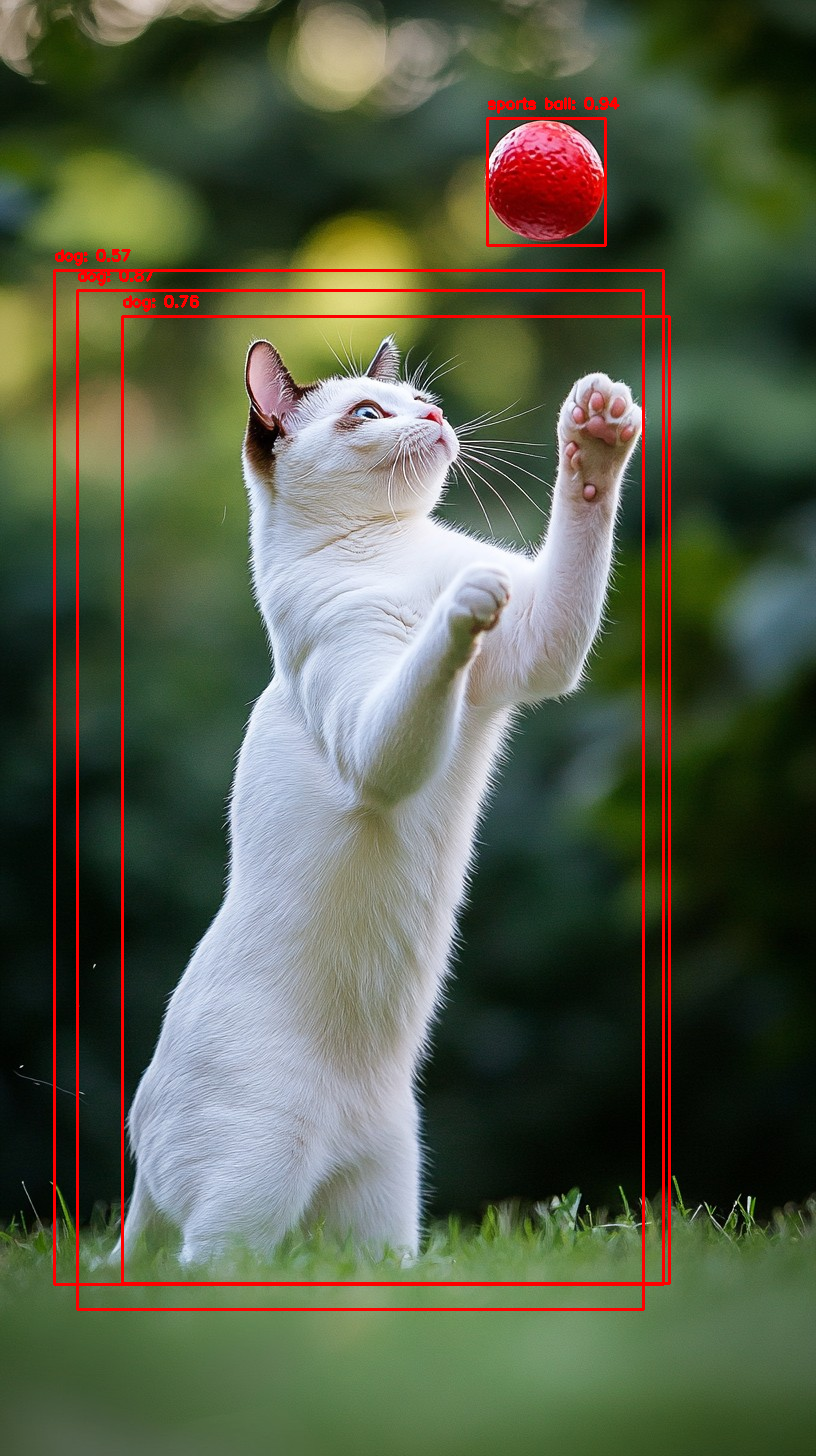

In [33]:
# Show results
from google.colab.patches import cv2_imshow
print("Without NMS (Multiple Overlapping Boxes):")
cv2_imshow(image_without_nms)

With NMS (Final Cleaned Detections):


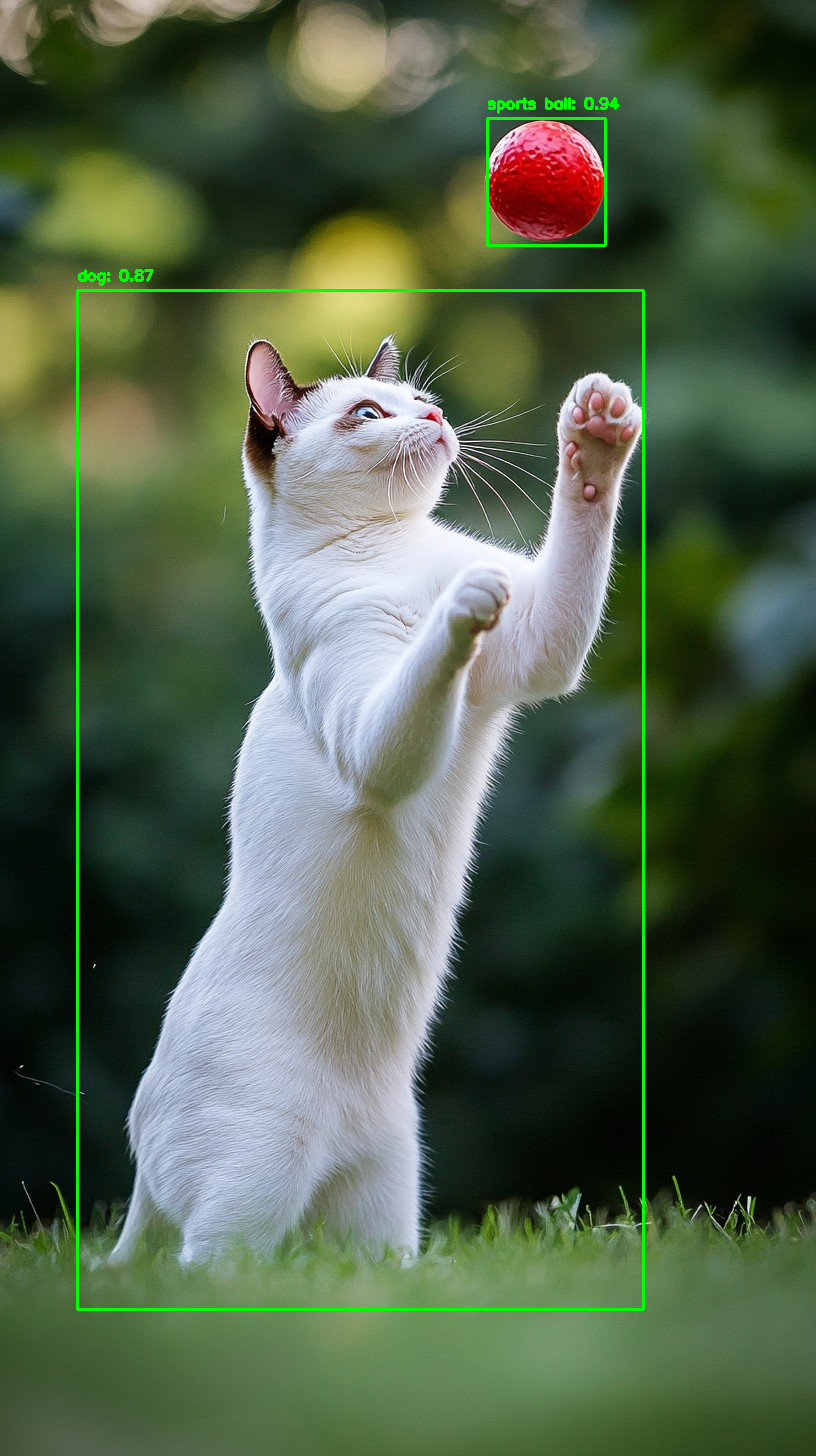

In [34]:
print("With NMS (Final Cleaned Detections):")
cv2_imshow(image_with_nms)

# **`explaination why NMS is necessary in object detection`**

 *Prevents duplicate detections.*

 *Speeds up object tracking in real-time applications.*

 *Improves accuracy by focusing on the most confident detection.*
